# Data Cleaning and Preparation

This notebook processes two datasets from the Statistical Office of Slovenia:
1. Building permits data (monthly)
2. Construction costs index data (quarterly)

The goal is to clean and merge these datasets for further analysis. Key steps:
- Load and parse PX files
- Clean and standardize column names
- Convert dates to proper datetime format
- Filter for relevant metrics
- Aggregate building permits data to quarterly frequency
- Merge the two datasets

### Step 1: Import Libraries and Set Up Logging

- Imports all necessary tools (pandas for data handling, matplotlib for plotting, etc.)
- Sets up logging to track what happens during data processing
- Creates file paths to where our raw data files are stored

In [21]:
import sys
from pathlib import Path
import logging
import pandas as pd
from pathlib import Path

# Add src to path for imports
sys.path.insert(0, str(Path(".").resolve().parent))

# Import all data processing functions from the module
from src.data_processing import (
    load_px_file,
    convert_to_datetime,
    clean_building_permits_data,
    process_construction_costs_data,
    process_residential_sales_data,
    aggregate_to_quarterly,
    merge_quarterly_data,
    validate_merged_data,
)

# Configure logging for the notebook
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)
logger.info("Data processing module imported successfully")


# Define data paths
DATA_DIR = Path("../data")
BUILDING_PERMITS_PATH = str(DATA_DIR / "building_permits_slovenia.PX")
COSTS_OF_CONSTRUCTION_PATH = str(DATA_DIR / "construction_costs_index.px")
NUMBER_AND_VALUE_OF_BUILDING_SALES = str(DATA_DIR / "number_and_value_of_residential_real_estate_sales.px")

# Load raw datasets
logger.info("Loading raw PX and CSV files...")
building_permits = load_px_file(BUILDING_PERMITS_PATH)
construction_costs = load_px_file(COSTS_OF_CONSTRUCTION_PATH)
residential_sales = load_px_file(NUMBER_AND_VALUE_OF_BUILDING_SALES)

logger.info(f"Building permits shape: {building_permits.shape}")
logger.info(f"Construction costs shape: {construction_costs.shape}")
logger.info(f"Residential sales shape: {residential_sales.shape}")

INFO:__main__:Data processing module imported successfully
INFO:__main__:Loading raw PX and CSV files...
INFO:__main__:Loading raw PX and CSV files...


Multilingual PX file


INFO:src.data_processing:Loaded PX file from ../data/building_permits_slovenia.PX
INFO:src.data_processing:Loaded PX file from ../data/construction_costs_index.px
INFO:src.data_processing:Loaded PX file from ../data/construction_costs_index.px
INFO:src.data_processing:Loaded PX file from ../data/number_and_value_of_residential_real_estate_sales.px
INFO:__main__:Building permits shape: (93636, 5)
INFO:__main__:Construction costs shape: (306, 3)
INFO:__main__:Residential sales shape: (1240, 4)
INFO:src.data_processing:Loaded PX file from ../data/number_and_value_of_residential_real_estate_sales.px
INFO:__main__:Building permits shape: (93636, 5)
INFO:__main__:Construction costs shape: (306, 3)
INFO:__main__:Residential sales shape: (1240, 4)


Multilingual PX file
Multilingual PX file


### Step 2: Load and Explore Building Permits Data

- Loads building permit data from a PX file (PC-Axis format used by statistical offices)
- Cleans the data by filtering only the columns we need
- Converts monthly data into quarterly data (sum 3 months = 1 quarter)

In [22]:
# Process building permits data to monthly time series
logger.info("Processing building permits data...")
building_permits_monthly = clean_building_permits_data(building_permits)

logger.info(f"Building permits monthly data shape: {building_permits_monthly.shape}")
logger.info(f"Date range: {building_permits_monthly['date'].min()} to {building_permits_monthly['date'].max()}")
logger.info(f"Total buildings: {building_permits_monthly['num_buildings'].sum():.0f}")

display(building_permits_monthly.head(10))

INFO:__main__:Processing building permits data...
INFO:src.data_processing:Cleaned building permits: 153 months
INFO:__main__:Building permits monthly data shape: (153, 2)
INFO:src.data_processing:Cleaned building permits: 153 months
INFO:__main__:Building permits monthly data shape: (153, 2)
INFO:__main__:Date range: 2013-01-01 00:00:00 to 2024-12-01 00:00:00
INFO:__main__:Date range: 2013-01-01 00:00:00 to 2024-12-01 00:00:00
INFO:__main__:Total buildings: 73248
INFO:__main__:Total buildings: 73248


,date,num_buildings
0,2013-01-01,294.0
6,2013-02-01,279.0
12,2013-03-01,296.0
18,2013-04-01,340.0
24,2013-05-01,308.0
30,2013-06-01,271.0
36,2013-07-01,282.0
42,2013-08-01,256.0
48,2013-09-01,309.0
54,2013-10-01,298.0


### Step 3: Load and Explore Construction Costs Data

- Loads construction cost index data (how expensive it is to build)
- Cleans and aggregates it to quarterly level
- An index = a standardized measure where 100 = baseline. 110 = 10% more expensive than baseline.

In [23]:
# Process construction costs data to quarterly time series
logger.info("Processing construction costs data...")
costs_quarterly = process_construction_costs_data(construction_costs)

logger.info(f"Construction costs quarterly data shape: {costs_quarterly.shape}")
logger.info(f"Date range: {costs_quarterly['date'].min()} to {costs_quarterly['date'].max()}")
logger.info(f"Cost index range: {costs_quarterly['construction_cost_index'].min():.1f} - {costs_quarterly['construction_cost_index'].max():.1f}")

display(costs_quarterly.head(10))

INFO:__main__:Processing construction costs data...
INFO:src.data_processing:Cleaned construction costs: 102 quarters
INFO:__main__:Construction costs quarterly data shape: (102, 2)
INFO:__main__:Date range: 2000-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Cost index range: 44.5 - 134.1
INFO:src.data_processing:Cleaned construction costs: 102 quarters
INFO:__main__:Construction costs quarterly data shape: (102, 2)
INFO:__main__:Date range: 2000-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Cost index range: 44.5 - 134.1


,date,construction_cost_index
0,2000-01-01,45.700000
3,2000-04-01,44.467795
6,2000-07-01,48.869504
9,2000-10-01,48.640959
12,2001-01-01,51.861356
15,2001-04-01,50.927667
18,2001-07-01,52.882280
21,2001-10-01,52.544298
24,2002-01-01,53.100000
27,2002-04-01,52.972270


### Step 4: Load and Explore Residential Sales Data

- Loads data on how many residential properties were sold and their average price
- Cleans to keep only relevant columns
- Converts to quarterly summaries

In [24]:
# Process residential sales data to quarterly time series
logger.info("Processing residential sales data...")
sales_quarterly = process_residential_sales_data(residential_sales)

logger.info(f"Residential sales quarterly data shape: {sales_quarterly.shape}")
logger.info(f"Date range: {sales_quarterly['date'].min()} to {sales_quarterly['date'].max()}")
logger.info(f"Total residential sales: {sales_quarterly['num_residential_sales'].sum():.0f}")
logger.info(f"Quarters with sales data: {sales_quarterly['num_residential_sales'].notna().sum()}")
logger.info(f"Average price range: €{sales_quarterly['avg_price_eur'].min():.0f} - €{sales_quarterly['avg_price_eur'].max():.0f}")

display(sales_quarterly.head(10))

INFO:__main__:Processing residential sales data...
INFO:src.data_processing:Cleaned residential sales: 62 quarters, 177482 total sales
INFO:src.data_processing:Cleaned residential sales: 62 quarters, 177482 total sales
INFO:__main__:Residential sales quarterly data shape: (62, 3)
INFO:__main__:Date range: 2010-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Total residential sales: 177482
INFO:__main__:Quarters with sales data: 62
INFO:__main__:Residential sales quarterly data shape: (62, 3)
INFO:__main__:Date range: 2010-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Total residential sales: 177482
INFO:__main__:Quarters with sales data: 62
INFO:__main__:Average price range: €71928 - €175712
INFO:__main__:Average price range: €71928 - €175712


,date,num_residential_sales,avg_price_eur
0,2010-01-01,1961.0,98209.669046
1,2010-04-01,2068.0,100986.058027
2,2010-07-01,1813.0,100781.401544
3,2010-10-01,1939.0,100211.545126
4,2011-01-01,1874.0,97012.691035
5,2011-04-01,1852.0,99696.407667
6,2011-07-01,1851.0,95789.421394
7,2011-10-01,2057.0,95128.230433
8,2012-01-01,2729.0,83906.148406
9,2012-04-01,2718.0,89218.006990


### Step 5: Preview Data Shapes and Sizes

- Shows the structure of each dataset (how many rows and columns)
- Displays first few rows to verify data looks correct
- Checks for any missing values that might cause problems


In [25]:
# Convert monthly permits data to quarterly
logger.info("Aggregating permits to quarterly frequency...")
building_permits_quarterly = aggregate_to_quarterly(building_permits_monthly, "num_buildings")

logger.info(f"Quarterly building permits data shape: {building_permits_quarterly.shape}")
logger.info(f"Date range: {building_permits_quarterly['date'].min()} to {building_permits_quarterly['date'].max()}")

display(building_permits_quarterly.head())

INFO:__main__:Aggregating permits to quarterly frequency...
INFO:__main__:Quarterly building permits data shape: (48, 2)
INFO:__main__:Quarterly building permits data shape: (48, 2)
INFO:__main__:Date range: 2013-03-31 00:00:00 to 2024-12-31 00:00:00
INFO:__main__:Date range: 2013-03-31 00:00:00 to 2024-12-31 00:00:00


,date,num_buildings
0,2013-03-31,869.0
1,2013-06-30,919.0
2,2013-09-30,847.0
3,2013-12-31,808.0
4,2014-03-31,729.0


### Step 6: Merge All Datasets Into One

- Combines all three datasets (permits, costs, sales) into a single table
- Aligns them by date so each row represents one quarter
- Creates one "master" dataset ready for analysis


In [26]:
logger.info("Date range comparison:")
logger.info(f"Permits quarterly: {building_permits_quarterly['date'].min()} to {building_permits_quarterly['date'].max()}")
logger.info(f"Costs quarterly: {costs_quarterly['date'].min()} to {costs_quarterly['date'].max()}")
logger.info(f"Sales quarterly: {sales_quarterly['date'].min()} to {sales_quarterly['date'].max()}")

INFO:__main__:Date range comparison:
INFO:__main__:Permits quarterly: 2013-03-31 00:00:00 to 2024-12-31 00:00:00
INFO:__main__:Costs quarterly: 2000-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Sales quarterly: 2010-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Permits quarterly: 2013-03-31 00:00:00 to 2024-12-31 00:00:00
INFO:__main__:Costs quarterly: 2000-01-01 00:00:00 to 2025-04-01 00:00:00
INFO:__main__:Sales quarterly: 2010-01-01 00:00:00 to 2025-04-01 00:00:00


### Step 7: Validate the Merged Data

- Runs checks to ensure the merged data is valid (no unexpected NaN values, correct date ranges, etc.)
- Confirms all three datasets are properly aligned


In [27]:
# Merge all quarterly datasets
logger.info("Merging quarterly datasets...")
final_data = merge_quarterly_data(building_permits_quarterly, costs_quarterly, sales_quarterly)

# Display summary statistics
logger.info(f"Final dataset shape: {final_data.shape}")
logger.info(f"Date range: {final_data['date'].min().date()} to {final_data['date'].max().date()}")
logger.info(f"Columns: {list(final_data.columns)}")

# Show sample
logger.info("Final dataset sample:")
display(final_data.head())
display(final_data.describe())

INFO:__main__:Merging quarterly datasets...
INFO:src.data_processing:Merged data: 48 quarters from 2013-01-01 to 2024-10-01
INFO:__main__:Final dataset shape: (48, 5)
INFO:src.data_processing:Merged data: 48 quarters from 2013-01-01 to 2024-10-01
INFO:__main__:Final dataset shape: (48, 5)
INFO:__main__:Date range: 2013-01-01 to 2024-10-01
INFO:__main__:Columns: ['date', 'num_buildings', 'construction_cost_index', 'num_residential_sales', 'avg_price_eur']
INFO:__main__:Final dataset sample:
INFO:__main__:Date range: 2013-01-01 to 2024-10-01
INFO:__main__:Columns: ['date', 'num_buildings', 'construction_cost_index', 'num_residential_sales', 'avg_price_eur']
INFO:__main__:Final dataset sample:


,date,num_buildings,construction_cost_index,num_residential_sales,avg_price_eur
0,2013-01-01,869.0,83.5,2345.0,80492.968443
1,2013-04-01,919.0,80.1,2601.0,82566.322568
2,2013-07-01,847.0,81.7,2008.0,77141.554283
3,2013-10-01,808.0,79.4,2285.0,74166.764114
4,2014-01-01,729.0,81.7,2345.0,71928.062687


,date,num_buildings,construction_cost_index,num_residential_sales,avg_price_eur
count,48,48.000000,48.000000,48.000000,48.000000
mean,2018-11-15 16:30:00,1432.666667,94.857844,3042.770833,107140.672776
min,2013-01-01 00:00:00,729.000000,78.800000,1790.000000,71928.062687
25%,2015-12-09 00:00:00,1306.500000,81.700000,2577.500000,82660.431136
50%,2018-11-16 00:00:00,1502.500000,87.800000,3080.000000,97321.354649
75%,2021-10-24 00:00:00,1681.500000,106.325000,3503.750000,127517.981902
max,2024-10-01 00:00:00,1942.000000,131.300000,4153.000000,174329.874610
std,NaN,327.824832,16.804479,598.611985,29900.735773


### Step 8: Calculate Descriptive Statistics

- Computes mean, median, std deviation for all key variables
- Shows the range (min-max) of values
- Gives us a first glimpse of what the data "looks like"


In [28]:
# Validate the merged dataset
logger.info("Validating merged data...")
validation_result = validate_merged_data(final_data)

logger.info(f"Validation complete: {len(validation_result['warnings'])} warnings")
if validation_result["warnings"]:
    for warning in validation_result["warnings"]:
        logger.warning(f"  - {warning}")
else:
    logger.info("All validation checks passed!")

INFO:__main__:Validating merged data...
INFO:__main__:Validation complete: 1 warnings
INFO:__main__:Validation complete: 1 warnings


### Step 9: Save and Visualize the Cleaned Data

- Creates time-series plots for all three main variables (price, permits, cost index)
- Plots them on the same figure to see how they move together over time
- Helps spot patterns, trends, and anomalies
- Exports the final merged and cleaned dataset to CSV format
- This "clean" dataset is now ready for analysis in the other notebooks


INFO:__main__:Creating visualization...
INFO:__main__:Visualization saved to ../figures/original_data_plot.png
INFO:__main__:Visualization saved to ../figures/original_data_plot.png


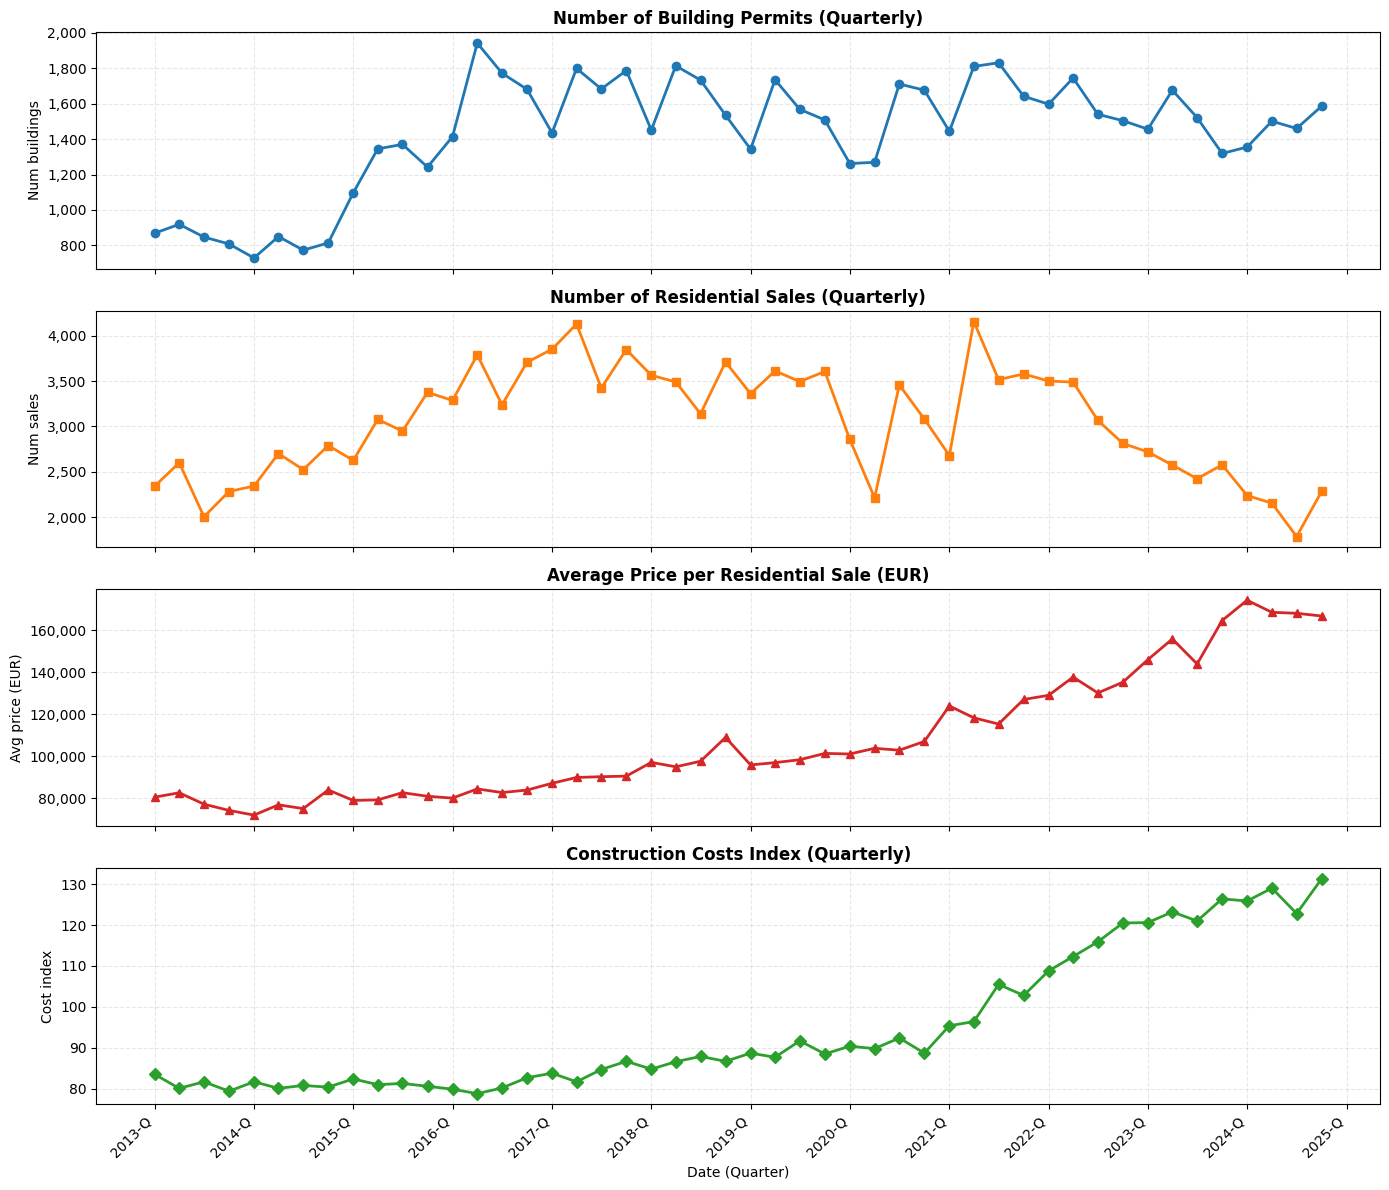

INFO:__main__:Processed data saved to: ../data/processed/quarterly_construction_data_with_sales.csv
INFO:__main__:Final dataset: 48 quarters, 5 columns
INFO:__main__:Final dataset: 48 quarters, 5 columns


In [29]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

logger.info("Creating visualization...")

# Build plotting with sales and costs — number of sales in its own separate subplot
fig, axes = plt.subplots(4, 1, figsize=(14, 12), sharex=True)

# Helper function for thousands separator
def thousands_formatter(x, pos):
    """Format numbers with thousands separator."""
    return f'{int(x):,}'

# 1) Number of building permits (quarterly)
axes[0].plot(final_data['date'], final_data['num_buildings'], marker='o', color='tab:blue', linewidth=2, markersize=6)
axes[0].set_title('Number of Building Permits (Quarterly)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Num buildings', fontsize=10)
axes[0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
axes[0].grid(True, alpha=0.3, linestyle='--')

# 2) Residential sales (bars) — separate subplot
if 'num_residential_sales' in final_data.columns and final_data['num_residential_sales'].notna().any():
    axes[1].plot(final_data['date'], final_data['num_residential_sales'], marker='s', color='tab:orange', linewidth=2, markersize=6)
    axes[1].set_title('Number of Residential Sales (Quarterly)', fontsize=12, fontweight='bold')
    axes[1].set_ylabel('Num sales', fontsize=10)
    axes[1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    axes[1].grid(True, alpha=0.3, linestyle='--')
else:
    axes[1].text(0.5, 0.5, 'Residential sales data not available', ha='center', va='center', transform=axes[1].transAxes)
    axes[1].set_title('Number of Residential Sales (Quarterly)', fontsize=12, fontweight='bold')
    axes[1].grid(True, alpha=0.3, linestyle='--')

# 3) Average price per sale (line)
if 'avg_price_eur' in final_data.columns and final_data['avg_price_eur'].notna().any():
    axes[2].plot(final_data['date'], final_data['avg_price_eur'], marker='^', color='tab:red', linewidth=2, markersize=6)
    axes[2].set_title('Average Price per Residential Sale (EUR)', fontsize=12, fontweight='bold')
    axes[2].set_ylabel('Avg price (EUR)', fontsize=10)
    axes[2].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
    axes[2].grid(True, alpha=0.3, linestyle='--')
else:
    axes[2].text(0.5, 0.5, 'Average price data not available', ha='center', va='center', transform=axes[2].transAxes)
    axes[2].set_title('Average Price per Residential Sale (EUR)', fontsize=12, fontweight='bold')
    axes[2].grid(True, alpha=0.3, linestyle='--')

# 4) Construction cost index
axes[3].plot(final_data['date'], final_data['construction_cost_index'], marker='D', color='tab:green', linewidth=2, markersize=6)
axes[3].set_title('Construction Costs Index (Quarterly)', fontsize=12, fontweight='bold')
axes[3].set_ylabel('Cost index', fontsize=10)
axes[3].set_xlabel('Date (Quarter)', fontsize=10)
axes[3].grid(True, alpha=0.3, linestyle='--')

# Format x-axis with dates
ax_date_formatter = mdates.DateFormatter('%Y-Q')
ax_locator = mdates.YearLocator()
axes[3].xaxis.set_major_locator(ax_locator)
axes[3].xaxis.set_major_formatter(ax_date_formatter)
plt.setp(axes[3].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../figures/original_data_plot.png', dpi=300, bbox_inches='tight')
logger.info("Visualization saved to ../figures/original_data_plot.png")
plt.show()

# Save the processed data (include sales)
output_path = Path("../data/processed/quarterly_construction_data_with_sales.csv")
output_path.parent.mkdir(exist_ok=True, parents=True)
final_data.to_csv(output_path, index=False)
logger.info(f"Processed data saved to: {output_path}")
logger.info(f"Final dataset: {final_data.shape[0]} quarters, {final_data.shape[1]} columns")